# Plot the atom/vacancy distribution as a function of SiO2 thickness

## step1: Import packages

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
from lmfit.models import ExponentialModel, GaussianModel

## step2: Import data

In [47]:
data1nm = pd.read_csv('data1nm.csv')
data2nm = pd.read_csv('data2nm.csv')
data5nm = pd.read_csv('data5nm.csv')
data10nm = pd.read_csv('data10nm.csv')
data15nm = pd.read_csv('data15nm.csv')
data20nm = pd.read_csv('data20nm.csv')
data25nm = pd.read_csv('data25nm.csv')
data30nm = pd.read_csv('data30nm.csv')
data50nm = pd.read_csv('data50nm.csv')

## step3: Convert data into common units

In [48]:
data10nm 

,Depth,Si,C
0,0.0,75200000.0,0.000000
1,0.5,41300000.0,2.480000
2,1.0,6370000.0,2.440000
3,1.5,2180000.0,2.390000
4,2.0,1420000.0,2.320000
...,...,...,...
56,28.0,0.0,0.008220
57,28.5,0.0,0.005870
58,29.0,0.0,0.000939
59,29.5,0.0,0.002580


## step4: 3D Plot

### Interpolate


In [49]:
def plot3d(depth,data,thickness):
    model1 = ExponentialModel() 
    model = model1
    params = model.make_params()
    params['amplitude'].set(value = data[0], vary=True)
    params['decay'].set(value = 2, vary=True)
    model_fit = model.fit(data, params, x=depth)
    fit_x = np.linspace(0,20,1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    ax.plot(fit_x, fitcurve, zs=thickness, zdir='y')



No handles with labels found to put in legend.


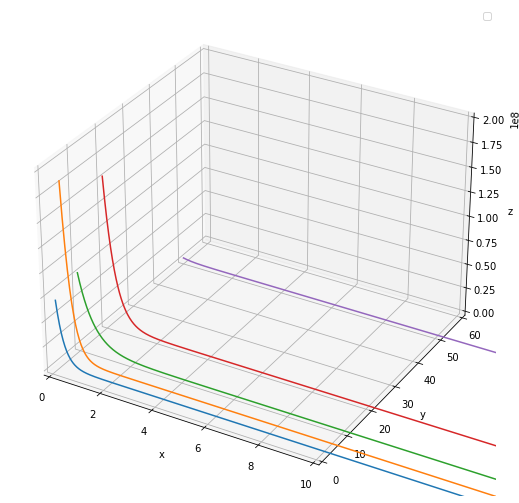

In [50]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()

ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 60)
ax.set_zlim(0, 2e8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
              
#plot
# plot3d(data1nm['Depth'],data1nm['Si'], 1)
plot3d(data2nm['Depth'],data2nm['Si'], 2)
plot3d(data5nm['Depth'],data5nm['Si'], 5)
plot3d(data10nm['Depth'],data10nm['Si'],10)
plot3d(data20nm['Depth'],data20nm['Si'], 20)
plot3d(data50nm['Depth'],data50nm['Si'], 50)


plt.show()

In [51]:
def plot3d(x,y,z):
    ax.plot(x, y, zs=z, zdir='y', lw = 2, linestyle = '--',)
    obj = ax.fill_between(x, 0, y, step='mid', alpha=0.1) 
    ax.add_collection3d(obj, zs = z, zdir = 'y')

No handles with labels found to put in legend.


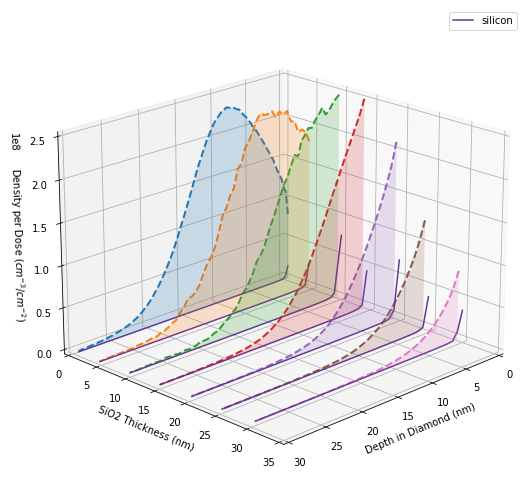

In [52]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()

ax.legend()
ax.set_xlim(0, 30)
ax.set_ylim(0, 35)
ax.set_zlim(0, 2.5e8)
ax.set_xlabel('Depth in Diamond (nm)')
ax.set_ylabel('SiO2 Thickness (nm)')
ax.set_zlabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

\
#plot
plot3d(data1nm['Depth'],data1nm['C']*1e8, 1)
plot3d(data5nm['Depth'],data5nm['C']*1e8, 5)
plot3d(data10nm['Depth'][1:],data10nm['C'][1:]*1e8,10)
plot3d(data15nm['Depth'][1:],data15nm['C'][1:]*1e8, 15)
plot3d(data20nm['Depth'][1:],data20nm['C'][1:]*1e8, 20)
plot3d(data25nm['Depth'][1:],data25nm['C'][1:]*1e8, 25)
plot3d(data30nm['Depth'][1:],data30nm['C'][1:]*1e8, 30)
# plot3d(data50nm['Depth'],data50nm['C']*1e8, 50)



ax.plot(data1nm['Depth'],data1nm['Si'], zs=1, zdir='y', lw = 1.5, color = 'rebeccapurple', label = 'silicon')
ax.plot(data5nm['Depth'],data5nm['Si'], zs=5, zdir='y', lw = 1.5, color = 'rebeccapurple')
ax.plot(data10nm['Depth'],data10nm['Si'], zs=10, zdir='y', lw = 1.5, color = 'rebeccapurple')
ax.plot(data15nm['Depth'],data15nm['Si'], zs=15, zdir='y', lw = 1.5, color = 'rebeccapurple')
ax.plot(data25nm['Depth'],data25nm['Si'], zs=25, zdir='y', lw = 1.5, color = 'rebeccapurple')
ax.plot(data20nm['Depth'],data20nm['Si'], zs=20, zdir='y', lw = 1.5, color = 'rebeccapurple')
ax.plot(data30nm['Depth'],data30nm['Si'], zs=30, zdir='y', lw = 1.5, color = 'rebeccapurple')


ax.view_init(elev=20., azim=45)

ax.legend()

### Fit with a gaussian

In [53]:
model1 = GaussianModel() 
model = model1
params = model.make_params()
print('parameter names: {}'.format(model.param_names))

parameter names: ['amplitude', 'center', 'sigma', 'fwhm', 'height']


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 60
    # variables        = 3
    chi-square         = 0.09207318
    reduced chi-square = 0.00161532
    Akaike info crit   = -382.770966
    Bayesian info crit = -376.487932
    R-squared          = 0.99814375
[[Variables]]
    amplitude:  41.0825903 +/- 0.66876349 (1.63%) (init = 2e+08)
    center:     2.11702347 +/- 0.13010511 (6.15%) (init = 0)
    sigma:      6.82629609 +/- 0.09529502 (1.40%) (init = 7.5)
    fwhm:       16.0746986 +/- 0.22440261 (1.40%) == '2.3548200*sigma'
    height:     2.40094816 +/- 0.01364317 (0.57%) == '0.3989423*amplitude/max(1e-15, sigma)'


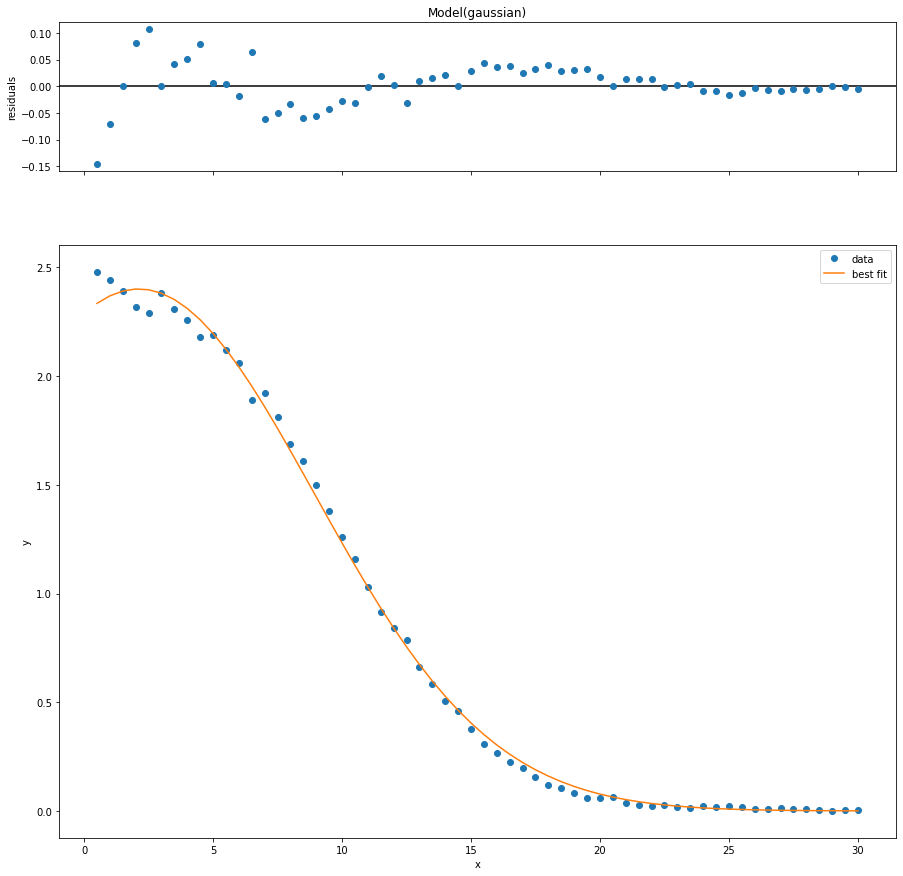

In [54]:
params['amplitude'].set(value = 2e8, vary=True)
params['center'].set(value = 0, vary=True)
params['sigma'].set(value = 7.5, vary=True)
    
model_fit = model.fit(data10nm['C'][1:], params, x=data10nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);
# fit_x = np.linspace(0,20,1000)
# fitcurve = model_fit.eval(model_fit.params, x = fit_x)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 55
    # variables        = 3
    chi-square         = 0.12209635
    reduced chi-square = 0.00234801
    Akaike info crit   = -330.065290
    Bayesian info crit = -324.043290
    R-squared          = 0.99737314
[[Variables]]
    amplitude:  37.7324717 +/- 0.35384284 (0.94%) (init = 2e+08)
    center:     5.64636768 +/- 0.06757481 (1.20%) (init = 0)
    sigma:      6.38845585 +/- 0.06987808 (1.09%) (init = 7.5)
    fwhm:       15.0436636 +/- 0.16455031 (1.09%) == '2.3548200*sigma'
    height:     2.35629382 +/- 0.01369754 (0.58%) == '0.3989423*amplitude/max(1e-15, sigma)'


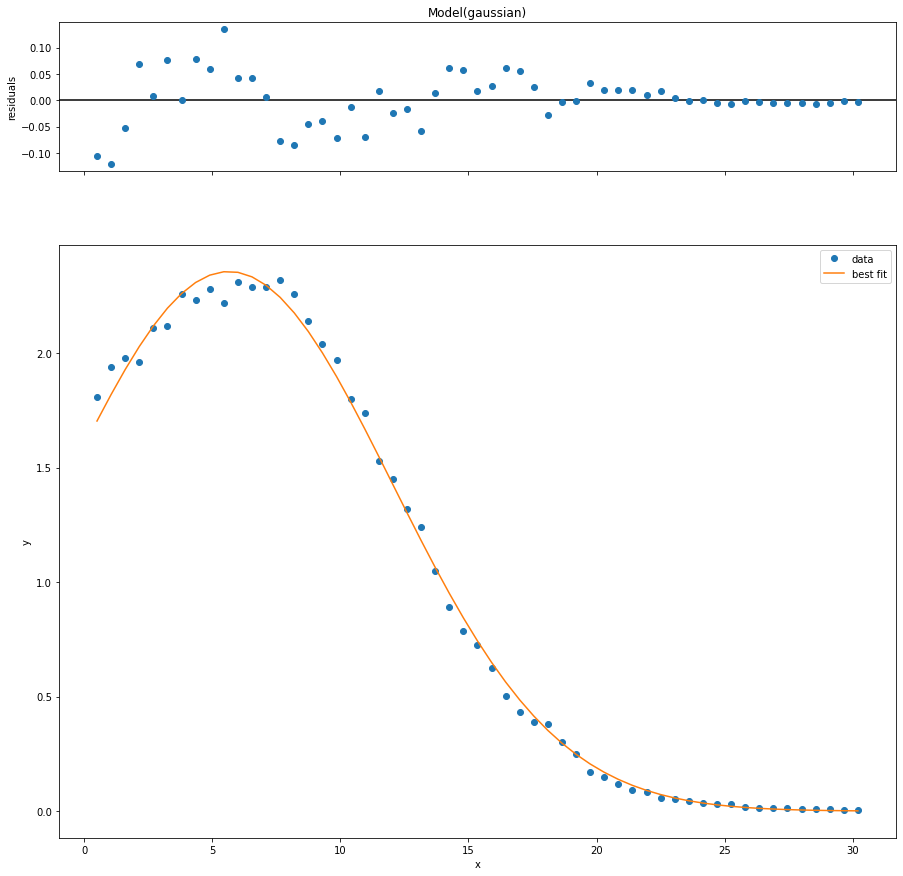

In [55]:
model_fit = model.fit(data5nm['C'], params, x=data5nm['Depth'])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);
# fit_x = np.linspace(0,20,1000)
# fitcurve = model_fit.eval(model_fit.params, x = fit_x)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 42
    # variables        = 3
    chi-square         = 0.00447227
    reduced chi-square = 1.1467e-04
    Akaike info crit   = -378.196164
    Bayesian info crit = -372.983155
    R-squared          = 0.99967827
[[Variables]]
    amplitude:  80.5733300 +/- 6.02429602 (7.48%) (init = 2e+08)
    center:    -8.08647139 +/- 0.54711026 (6.77%) (init = 0)
    sigma:      7.94464169 +/- 0.16922356 (2.13%) (init = 7.5)
    fwhm:       18.7082012 +/- 0.39849101 (2.13%) == '2.3548200*sigma'
    height:     4.04601124 +/- 0.21812201 (5.39%) == '0.3989423*amplitude/max(1e-15, sigma)'


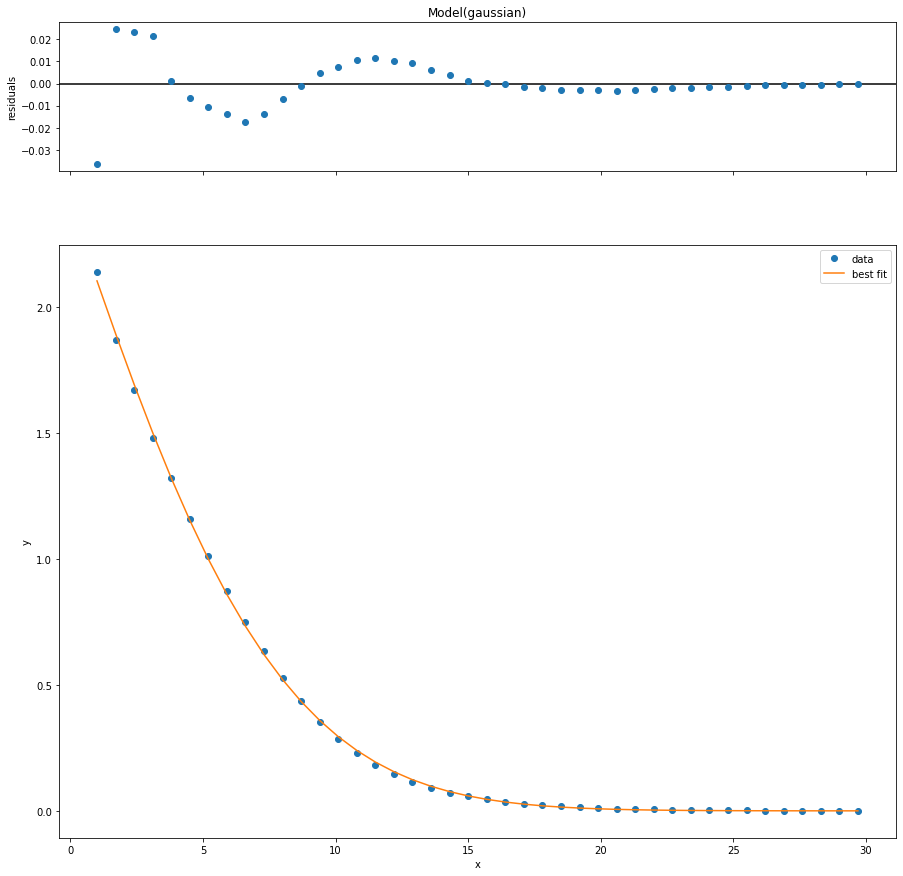

In [56]:
model_fit = model.fit(data20nm['C'][1:], params, x=data20nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);
# fit_x = np.linspace(0,20,1000)
# fitcurve = model_fit.eval(model_fit.params, x = fit_x)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 96
    # variables        = 3
    chi-square         = 0.16032207
    reduced chi-square = 0.00172389
    Akaike info crit   = -607.912197
    Bayesian info crit = -600.219152
    R-squared          = 0.99780303
[[Variables]]
    amplitude:  35.9802345 +/- 0.15899924 (0.44%) (init = 2e+08)
    center:     8.32227260 +/- 0.02982094 (0.36%) (init = 0)
    sigma:      6.09034346 +/- 0.03333627 (0.55%) (init = 7.5)
    fwhm:       14.3416626 +/- 0.07850092 (0.55%) == '2.3548200*sigma'
    height:     2.35685190 +/- 0.00895524 (0.38%) == '0.3989423*amplitude/max(1e-15, sigma)'


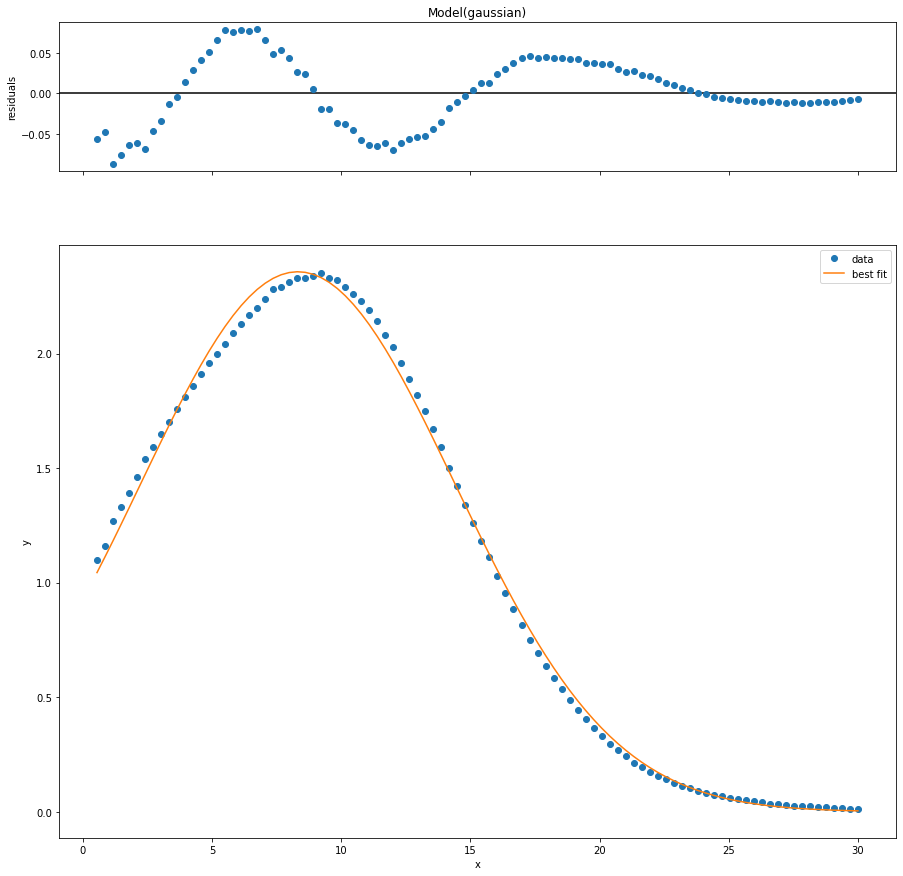

In [57]:
model_fit = model.fit(data1nm['C'][1:], params, x=data1nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5189
    # data points      = 42
    # variables        = 3
    chi-square         = 3.4784e-04
    reduced chi-square = 8.9190e-06
    Akaike info crit   = -485.460264
    Bayesian info crit = -480.247256
    R-squared          = 0.99977956
[[Variables]]
    amplitude:  3.3075e+10 +/- 2.7444e+11 (829.76%) (init = 2e+08)
    center:    -140.176288 +/- 54.9025600 (39.17%) (init = 0)
    sigma:      22.0726054 +/- 4.20802532 (19.06%) (init = 7.5)
    fwhm:       51.9770127 +/- 9.90914217 (19.06%) == '2.3548200*sigma'
    height:     5.9780e+08 +/- 4.8464e+09 (810.70%) == '0.3989423*amplitude/max(1e-15, sigma)'


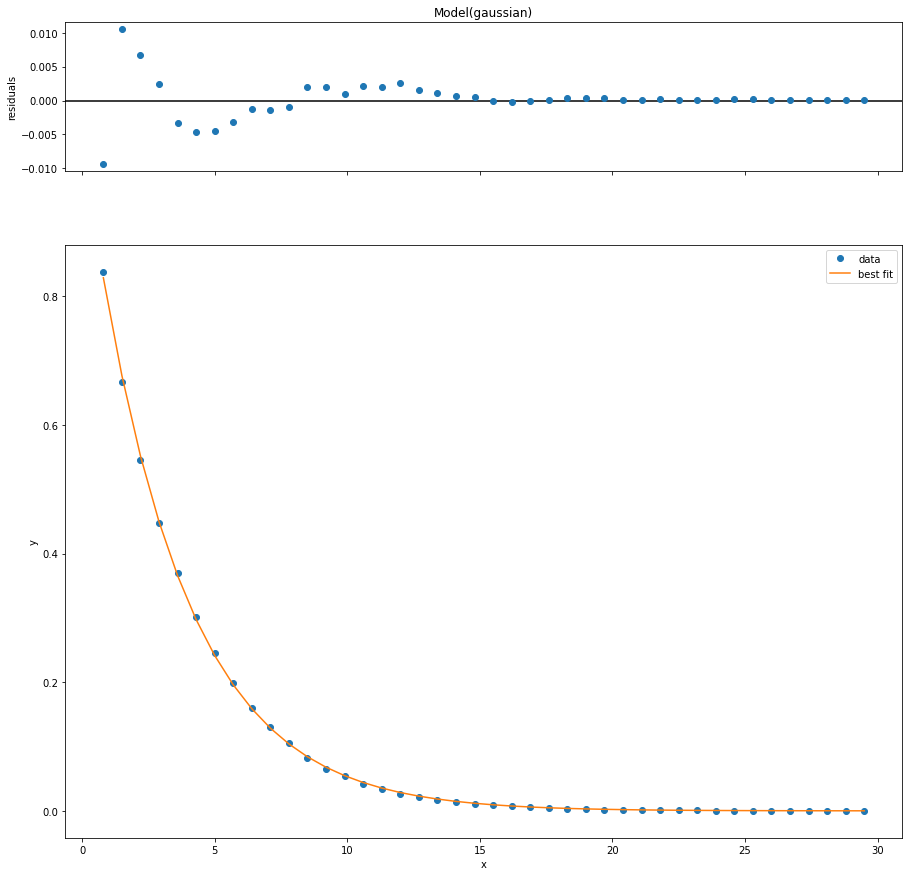

In [58]:
model_fit = model.fit(data30nm['C'][1:], params, x=data30nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 45
    # variables        = 3
    chi-square         = 0.00576934
    reduced chi-square = 1.3737e-04
    Akaike info crit   = -397.283674
    Bayesian info crit = -391.863687
    R-squared          = 0.99978609
[[Variables]]
    amplitude:  49.1525826 +/- 0.97972429 (1.99%) (init = 2e+08)
    center:    -1.97409021 +/- 0.15249916 (7.73%) (init = 0)
    sigma:      7.04458865 +/- 0.06957920 (0.99%) (init = 7.5)
    fwhm:       16.5887383 +/- 0.16384650 (0.99%) == '2.3548200*sigma'
    height:     2.78356130 +/- 0.02948431 (1.06%) == '0.3989423*amplitude/max(1e-15, sigma)'


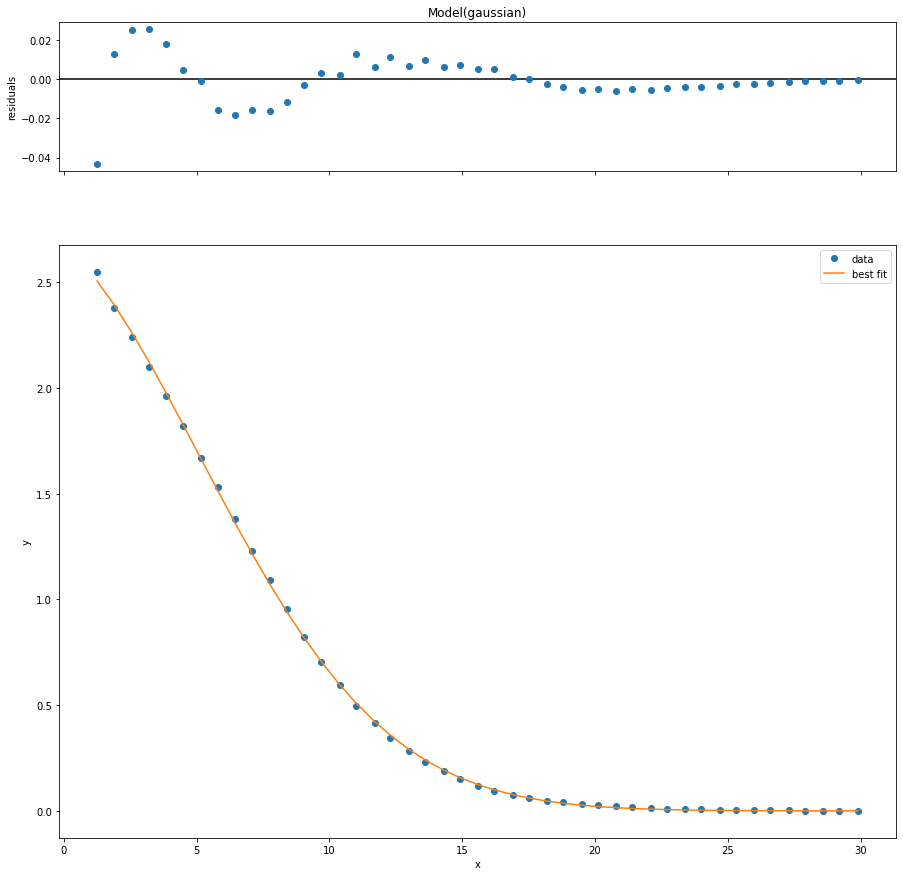

In [59]:
model_fit = model.fit(data15nm['C'][1:], params, x=data15nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 105
    # data points      = 39
    # variables        = 3
    chi-square         = 5.1322e-04
    reduced chi-square = 1.4256e-05
    Akaike info crit   = -432.296304
    Bayesian info crit = -427.305620
    R-squared          = 0.99988116
[[Variables]]
    amplitude:  269.821036 +/- 45.3363321 (16.80%) (init = 2e+08)
    center:    -18.5021921 +/- 1.14262992 (6.18%) (init = 0)
    sigma:      9.53436153 +/- 0.23707946 (2.49%) (init = 7.5)
    fwhm:       22.4517052 +/- 0.55827946 (2.49%) == '2.3548200*sigma'
    height:     11.2900087 +/- 1.61823238 (14.33%) == '0.3989423*amplitude/max(1e-15, sigma)'


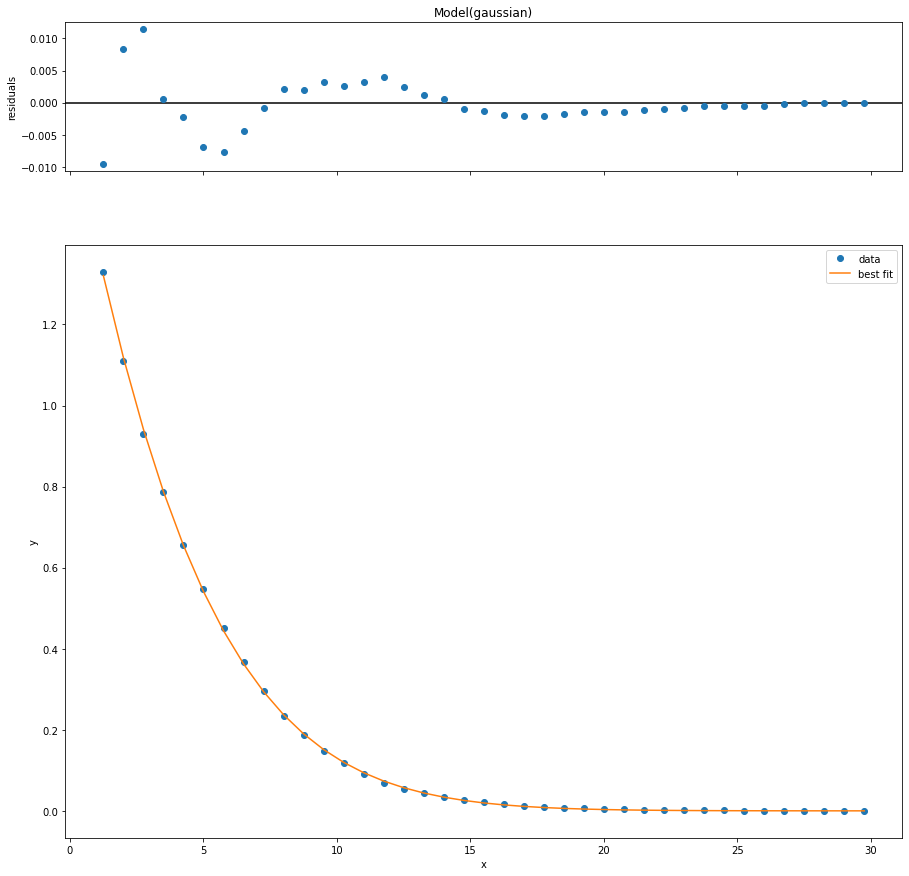

In [60]:
model_fit = model.fit(data25nm['C'][1:], params, x=data25nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);